# Types of Feature scaling techniques:

Standardization: In this technique we try to bring every feature on a similar scale. It centers the variable to 0. i.e. Mean of varibales is generally brought to 0 and standard deviation to 1, in this technique. It's formula is more or less similar to Z-Score technique

Z=(X-X_mean)/std

In [3]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head(10)

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,NaN,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [5]:
df.Age.fillna(df.Age.median(),inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [8]:
df.head(10)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
5,0,3,28.0,8.4583
6,0,1,54.0,51.8625
7,0,3,2.0,21.0750
8,1,3,27.0,11.1333
9,1,2,14.0,30.0708


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss=StandardScaler()

In [11]:
df_scaled=ss.fit_transform(df)

In [19]:
df_scaled=pd.DataFrame(df_scaled, columns=['Survived','Pclass','Age','Fare'])
df_scaled

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


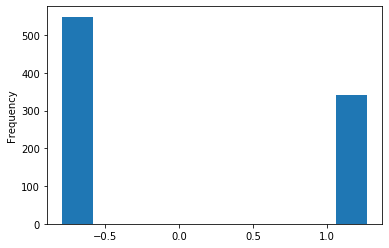

In [22]:
df_scaled['Survived'].plot(kind='hist')

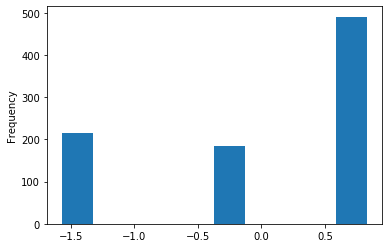

In [23]:
df_scaled['Pclass'].plot(kind='hist')

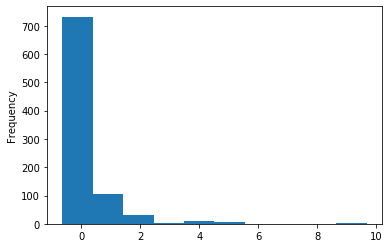

In [29]:
df_scaled['Fare'].plot(kind='hist')

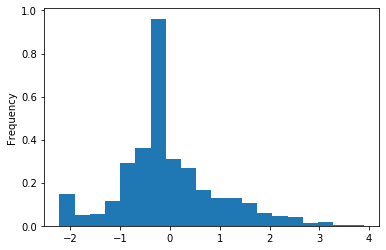

In [43]:
df_scaled['Age'].plot(kind='hist',bins=20,density=True)

### MIN MAX SCALING

### The min max scaling technique works best with Deep learning techniques like CNN, but in ML we also use mix max scaling at some situations

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
mms=MinMaxScaler()

In [34]:
scaled_df=pd.DataFrame(mms.fit_transform(df), columns=['Survived','Pclass','Age','Fare'])
scaled_df

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


# ROBUST SCALER

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
rs=RobustScaler()

In [37]:
new=pd.DataFrame(rs.fit_transform(df), columns=['Survived','Pclass','Age','Fare'])
new

<IPython.core.display.Javascript object>

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


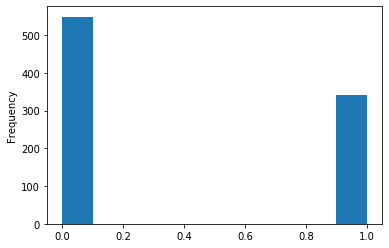

In [38]:
new['Survived'].plot(kind='hist')

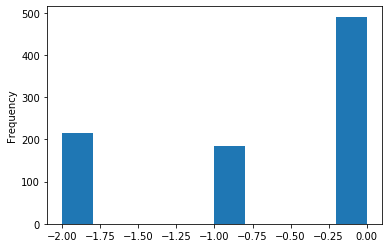

In [39]:
new['Pclass'].plot(kind='hist')

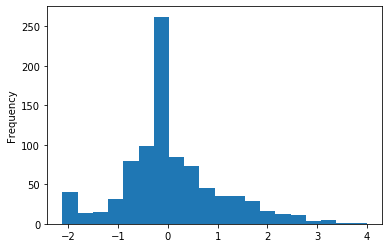

In [42]:
new['Age'].plot(kind='hist', bins=20)

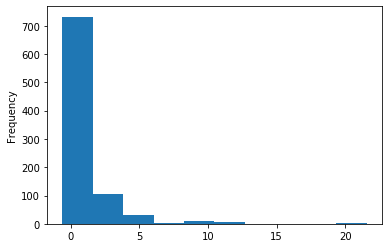

In [41]:
new['Fare'].plot(kind='hist')

In [44]:
import scipy.stats as stat
import pylab

In [54]:
def qq_norm_plot(ds,ftr):
    plt.figure(figsize=[10,6])
    plt.subplot(1,2,1)
    ds[ftr].plot(kind='hist', bins=20)
    plt.subplot(1,2,2)
    stat.probplot(ds[ftr],dist='norm', plot=pylab)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

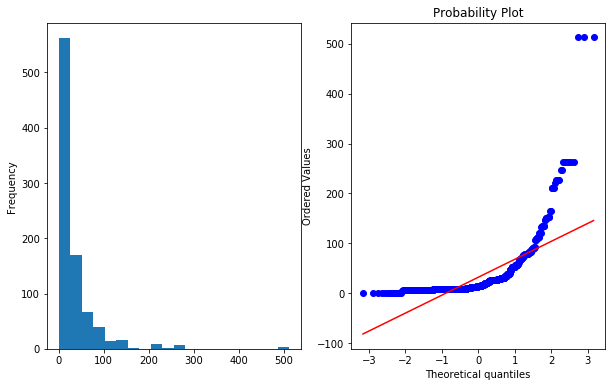

In [55]:
qq_norm_plot(df,'Fare')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

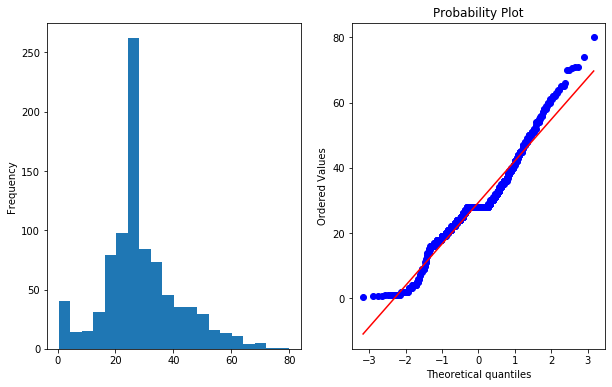

In [56]:
qq_norm_plot(df,'Age')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

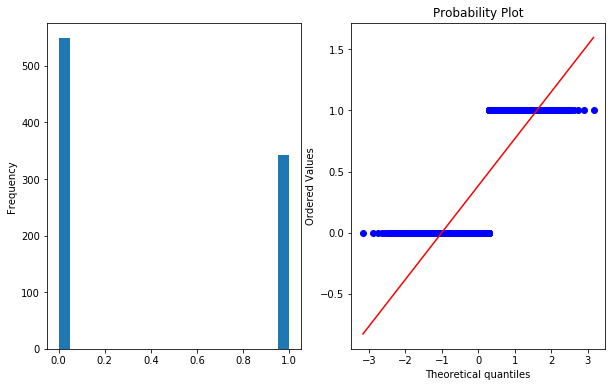

In [57]:
qq_norm_plot(df,'Survived')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

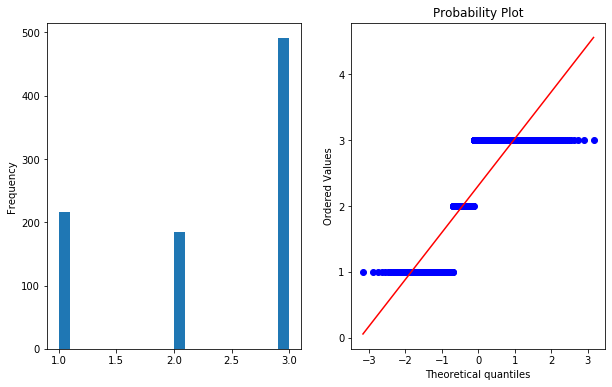

In [58]:
qq_norm_plot(df,'Pclass')

# Logarithmic Transformation:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

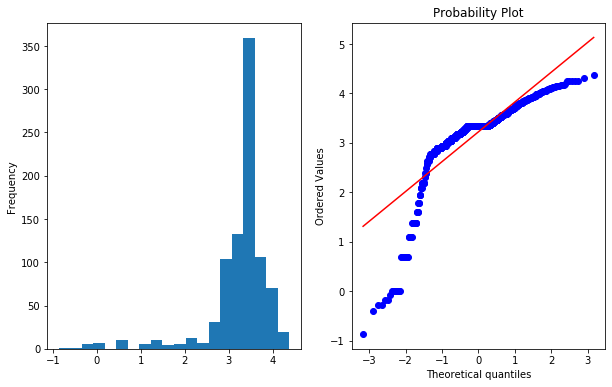

In [63]:
df['log_age']=np.log(df['Age'])
qq_norm_plot(df,'log_age')

# Reciprocal Transfromation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

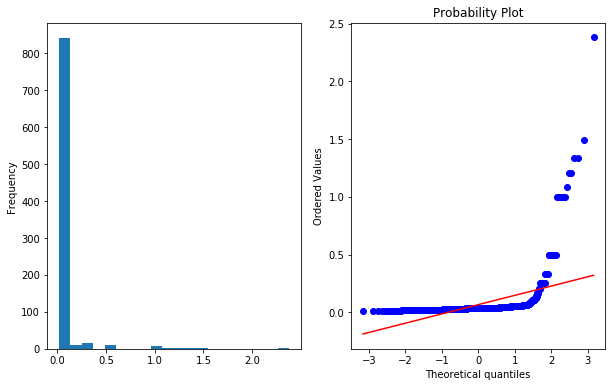

In [68]:
df['Reciprocal_age']=1/df['Age']
qq_norm_plot(df,'Reciprocal_age')
#Not a normal distribution as depicted by image

# Square Root Transformation:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

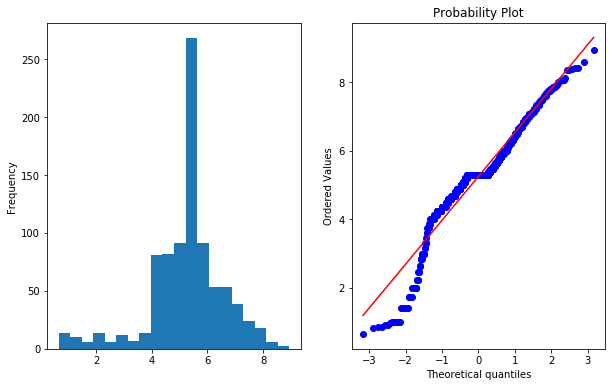

In [67]:
df['Sqrt_Age']=df['Age']**(1/2)
qq_norm_plot(df,'Sqrt_Age')
#Normal Distribution from image

# Exponential Transformation:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

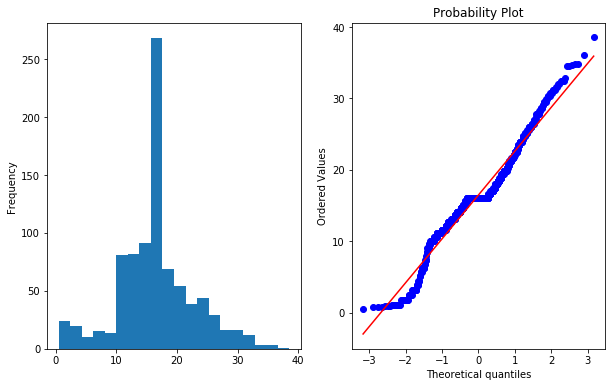

In [85]:
df['Expo_test']=df['Age']**(1/1.2)
qq_norm_plot(df,'Expo_test')

In [86]:
df

,Survived,Pclass,Age,Fare,log_age,Reciprocal_age,Sqrt_Age,Expo_test
0,0,3,22.0,7.2500,3.091042,0.045455,4.690416,13.142729
1,1,1,38.0,71.2833,3.637586,0.026316,6.164414,20.724608
2,1,3,26.0,7.9250,3.258097,0.038462,5.099020,15.105825
3,1,1,35.0,53.1000,3.555348,0.028571,5.916080,19.351889
4,0,3,35.0,8.0500,3.555348,0.028571,5.916080,19.351889
...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,3.295837,0.037037,5.196152,15.588457
887,1,1,19.0,30.0000,2.944439,0.052632,4.358899,11.631293
888,0,3,28.0,23.4500,3.332205,0.035714,5.291503,16.068119
889,1,1,26.0,30.0000,3.258097,0.038462,5.099020,15.105825


# BOX COX Transformation:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

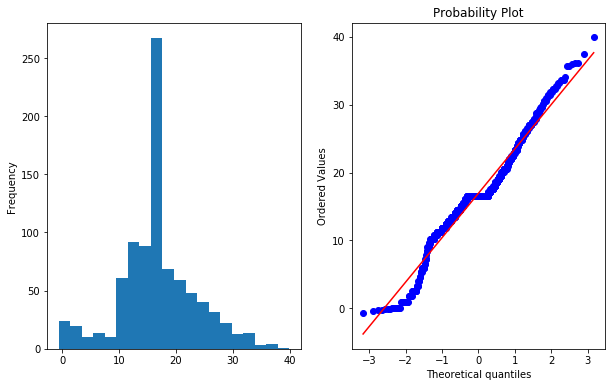

In [90]:
df['Age_box_cox'],parameters=stat.boxcox(df['Age'])
qq_norm_plot(df,'Age_box_cox')
#Normal Distribution